<a href="https://colab.research.google.com/github/mingjiez912/Machine_Learning_Lab/blob/main/MLLABAssignmnet2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.) Import the data from CCLE into a new Google Colab file

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt

In [3]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [4]:
df = pd.read_csv('/content/gdrive/MyDrive/insurance.csv')

In [5]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [7]:
df.loc[df["sex"] == "female", "sex"] = 1
df.loc[df["sex"] == "male", "sex"] = 0

In [16]:
# Convert smoker and region. Investigate scikit.LabelEncoder 
df.loc[df["smoker"] == "yes", "smoker"] = 1
df.loc[df["smoker"] == "no", "smoker"] = 0 

In [28]:
le = preprocessing.LabelEncoder()
df["region"] = le.fit_transform(df["region"])

In [29]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,1,21984.47061
4,32,0,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,1,10600.54830
1334,18,1,31.920,0,0,0,2205.98080
1335,18,1,36.850,0,0,2,1629.83350
1336,21,1,25.800,0,0,3,2007.94500


In [8]:
import numpy as np

In [45]:
data = np.array(df.iloc[:,:-1])
target = np.array(df.iloc[:,-1])

In [31]:
data

array([[19, 1, 27.9, 0, 1, 3],
       [18, 0, 33.77, 1, 0, 2],
       [28, 0, 33.0, 3, 0, 2],
       ...,
       [18, 1, 36.85, 0, 0, 2],
       [21, 1, 25.8, 0, 0, 3],
       [61, 1, 29.07, 0, 1, 1]], dtype=object)

# 2.) Split the data into 80/20, in/out sample

In [39]:
cut = int(len(data)*0.8//1)

In [46]:
in_data = data[:cut]
out_data = data[cut:]
in_target = target[:cut]
out_target = target[cut:]

# 3.) Normalize the Data

In [13]:
from sklearn import preprocessing

In [41]:
scaler = preprocessing.StandardScaler().fit(in_data)
in_data_scale = scaler.transform(in_data)
out_data_scale = scaler.transform(out_data)

In [42]:
in_data_scale

array([[-1.45390122,  1.02077653, -0.47403991, -0.90286618,  1.99417757,
         1.34066165],
       [-1.52464584, -0.97964634,  0.4911621 , -0.06353793, -0.50145986,
         0.4373191 ],
       [-0.81719959, -0.97964634,  0.36455128,  1.61511857, -0.50145986,
         0.4373191 ],
       ...,
       [-0.03900872, -0.97964634,  1.95211949, -0.90286618, -0.50145986,
        -1.36936599],
       [ 1.65886228, -0.97964634, -1.50008089, -0.06353793, -0.50145986,
        -0.46602344],
       [ 1.02216066,  1.02077653,  0.18367867, -0.06353793, -0.50145986,
         0.4373191 ]])

# 4.) Get lambda from Lasso cross validation

In [36]:
from sklearn.linear_model import LassoCV

In [47]:
modCV = LassoCV().fit(in_data_scale, in_target)

In [48]:
a = modCV.alpha_ # Optimized Lambda
a

133.34880015958146

# 5.) Run a lambda regression with that Lambda

In [50]:
from sklearn.linear_model import Lasso

In [51]:
mod1 = Lasso(alpha = a).fit(in_data_scale, in_target)

In [53]:
mod1.coef_

array([3564.26137833,    0.        , 1890.8527485 ,  398.24050447,
       9324.84227138, -326.52198757])

# 6.) Visualize the coefficients 

<BarContainer object of 6 artists>

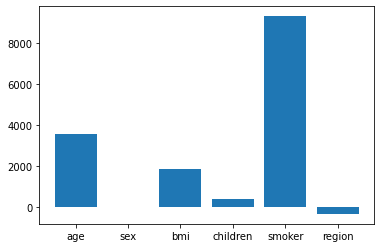

In [63]:
x = ["age","sex","bmi","children","smoker","region"]
plt.bar(x, mod1.coef_)

# 7.) Interpret the coefficients

The coefficient of sex is 0 indicating that there are no relationship between sex and the amount of insurance. Therefore, we can drop this variable in our model. 

# 8.) Compare in and out of sample MSE’s

In [65]:
from sklearn.metrics import mean_squared_error

In [69]:
mod1.predict(in_data_scale)

array([24933.78011265,  3864.47297708,  6815.10290666, ...,
       12177.79520243, 11741.14195836, 12360.55112834])

In [72]:
in_sample_mse = mean_squared_error(in_target, mod1.predict(in_data_scale))
in_sample_mse

36490415.101693384

In [73]:
mod1.predict(out_data_scale)
out_sample_mse = mean_squared_error(out_target, mod1.predict(out_data_scale))
out_sample_mse

37252730.724018715